In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-12-29 10:37:57.403489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[:2]*255

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [6]:
y_train[:2]

array([5, 0], dtype=uint8)

In [7]:
X_train[1].shape

(28, 28)

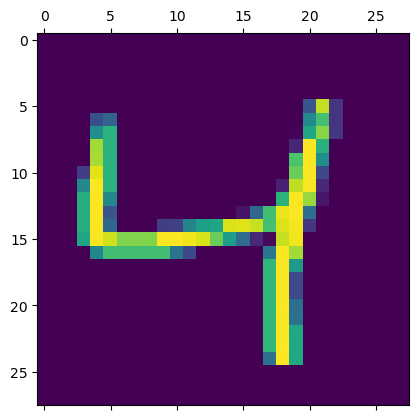

In [8]:
plt.matshow(X_train[2])

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [11]:
X_train_flattened[9]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

2022-12-29 10:38:56.869997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4664 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9259


In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2661 - accuracy: 0.9273


[0.2660636305809021, 0.927299976348877]

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 4ms/step


array([2.7601378e-02, 4.3926158e-07, 6.8519808e-02, 9.5392108e-01,
       3.8485792e-03, 1.2732534e-01, 1.9890329e-06, 9.9985552e-01,
       1.2010855e-01, 7.0482934e-01], dtype=float32)

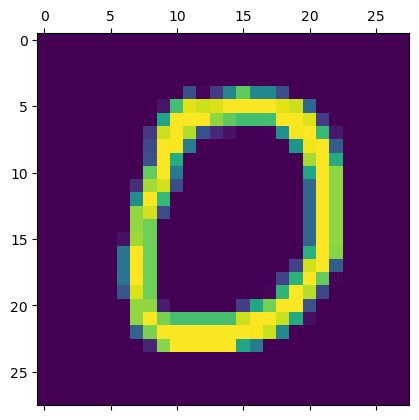

In [15]:
plt.matshow(X_test[10])

In [16]:
np.argmax(y_predicted[10])

0

In [17]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [18]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    8,  930,   12,    9,    5,   12,   10,   39,    3],
       [   4,    0,   23,  906,    1,   28,    2,   13,   26,    7],
       [   1,    1,    3,    1,  922,    0,   11,    4,    9,   30],
       [  10,    3,    2,   19,   12,  781,   18,    6,   34,    7],
       [  12,    3,    7,    1,    7,   10,  913,    2,    3,    0],
       [   1,    5,   22,    5,    7,    0,    0,  961,    3,   24],
       [   7,    6,    7,   15,   10,   20,   10,   11,  881,    7],
       [  11,    5,    1,    8,   36,    7,    0,   29,    8,  904]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

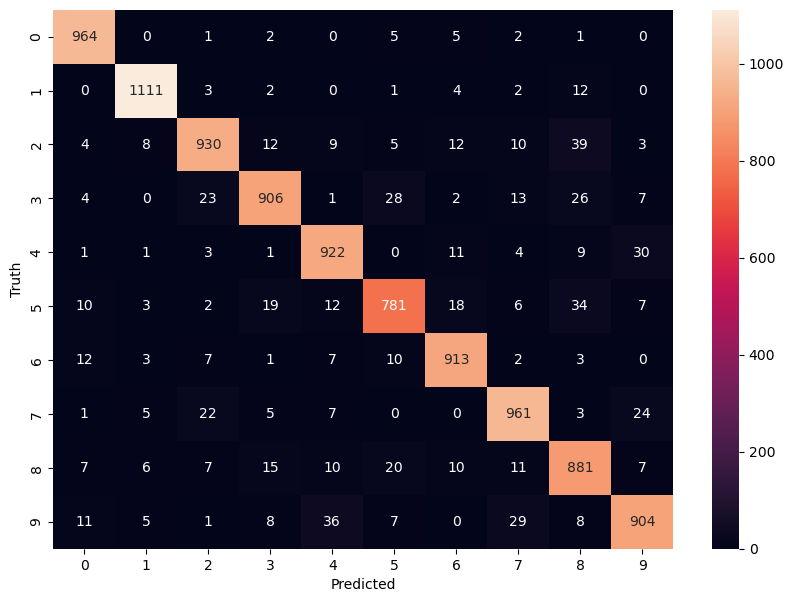

In [20]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='0')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
958+1107+5+23+908+934+913+728+926+950+889+919

9260

In [22]:
len(y_test)

10000

In [23]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2791 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1276 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9839


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0864 - accuracy: 0.9737


[0.08641945570707321, 0.9736999869346619]

In [25]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [26]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    8,  930,   12,    9,    5,   12,   10,   39,    3],
       [   4,    0,   23,  906,    1,   28,    2,   13,   26,    7],
       [   1,    1,    3,    1,  922,    0,   11,    4,    9,   30],
       [  10,    3,    2,   19,   12,  781,   18,    6,   34,    7],
       [  12,    3,    7,    1,    7,   10,  913,    2,    3,    0],
       [   1,    5,   22,    5,    7,    0,    0,  961,    3,   24],
       [   7,    6,    7,   15,   10,   20,   10,   11,  881,    7],
       [  11,    5,    1,    8,   36,    7,    0,   29,    8,  904]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

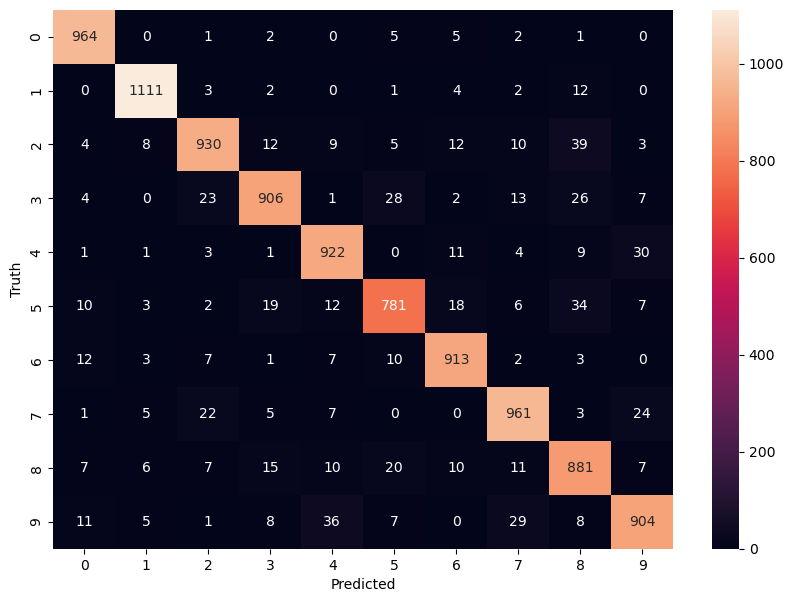

In [27]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='0')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6631 - accuracy: 0.8324
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3441 - accuracy: 0.9043
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.9169
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2644 - accuracy: 0.9251
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2425 - accuracy: 0.9312
